# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 30th, 2025 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. You should provide solutions to the exercises with the following titles from **Part 1** 

#### Part 1

##### Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook*


<details>
  <summary style="cursor: pointer; font-weight: bold; margin-bottom: 10px; ">
    What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
  </summary>
  
  <div style="padding: 10px; padding-left: 20px; box-sizing: border-box;">
    <p>A problem with random networks as a model for real-world networks, according to section 3.5, is that in a large random network, the degree of most nodes is close to the average degree (<code>&lt;k&gt;</code>), while in real-world networks, node degrees can vary much more widely.</p>
    <p>The degree of a node in a network refers to the number of links it has to other nodes. In large random networks, node degrees follow a Poisson distribution, with a peak at <code>&lt;k&gt;</code>. This means that most nodes have degrees close to <code>&lt;k&gt;</code>, so the variability in node degrees is relatively small. In contrast, real-world networks often include nodes with very high degrees and others with very low degrees. For example, in a social network, some individuals may be highly connected, while others are more isolated.</p>
  </div>
</details>

<hr>

<details>
  <summary style="cursor: pointer; font-weight: bold; margin-bottom: 10px;">
    List the four regimes that characterize random networks as a function of &lt;k&gt;.
  </summary>
  
  <div style="padding: 10px; padding-left: 25px; box-sizing: border-box;">
    <p>Four different regimes can be distinguished in a random network as <code>&lt;k&gt;</code> changes:</p>
    <ol>
      <li><strong>Subcritical regime:</strong> <code>0 &lt; &lt;k&gt; &lt; 1</code>. If <code>&lt;k&gt; = 0</code>, all nodes in the network are isolated. As <code>&lt;k&gt;</code> increases (but remains below 1), small clusters begin to form, but not all nodes are connected. Therefore, in this regime, we only observe small, disconnected clusters.</li>
      <li><strong>Critical regime:</strong> <code>&lt;k&gt; = 1</code>. This is the critical point that separates the regime without a giant component from the one where a giant component emerges. At this point, clusters are still too small to be considered a true giant component.</li>
      <li><strong>Supercritical regime:</strong> <code>&lt;k&gt; &gt; 1</code>. In this regime, a giant component exists. The further <code>&lt;k&gt;</code> increases above 1, the larger this giant component becomes. It coexists with other small, isolated components. This regime is the most relevant for modeling real systems.</li>
      <li><strong>Connected regime:</strong> <code>&lt;k&gt; &gt; ln N</code>. In this regime, almost all nodes are connected, forming a single connected network. As <code>&lt;k&gt;</code> increases further, the network becomes denser, and it turns into a complete graph only when <code>&lt;k&gt; = N - 1</code>.</li>
    </ol>
    <p>In summary, the random network model shows that network formation is not gradual. For small <code>&lt;k&gt;</code> we see isolated nodes and small clusters, but at a critical point they suddenly start merging into a giant component.</p>
  </div>
</details>

<hr>

<details>
  <summary style="cursor: pointer; font-weight: bold; margin-bottom: 10px;">
    According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?
  </summary>
  
  <div style="padding: 10px; padding-left: 25px; box-sizing: border-box;">
    <p>In random networks, the clustering coefficient is independent of a node’s degree, and the average clustering coefficient <code>&lt;C&gt;</code> scales as <code>1/N</code>, meaning it becomes very small for large networks. In contrast, in real-world networks the average clustering coefficient is largely independent of <code>N</code>, and remains much higher than what a random network with the same <code>N</code> and <code>L</code> would predict. Moreover, in real networks, the clustering coefficient is dependent of a node's degree, decreasing as <code>k</code> increases.</p>
    <p>This is a problem because it shows that <strong>random networks cannot reproduce the high clustering structure observed in real-world systems</strong>, making them a poor model for real networks.</p>
  </div>
</details>


##### *WS edition*

**First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length <d> for each one.**

In [71]:
# import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Average shortest path length for WS graph with p=0: 62.875751503006015
Average shortest path length for WS graph with p=0.1: 8.108585170340682
Average shortest path length for WS graph with p=1: 4.757002004008016


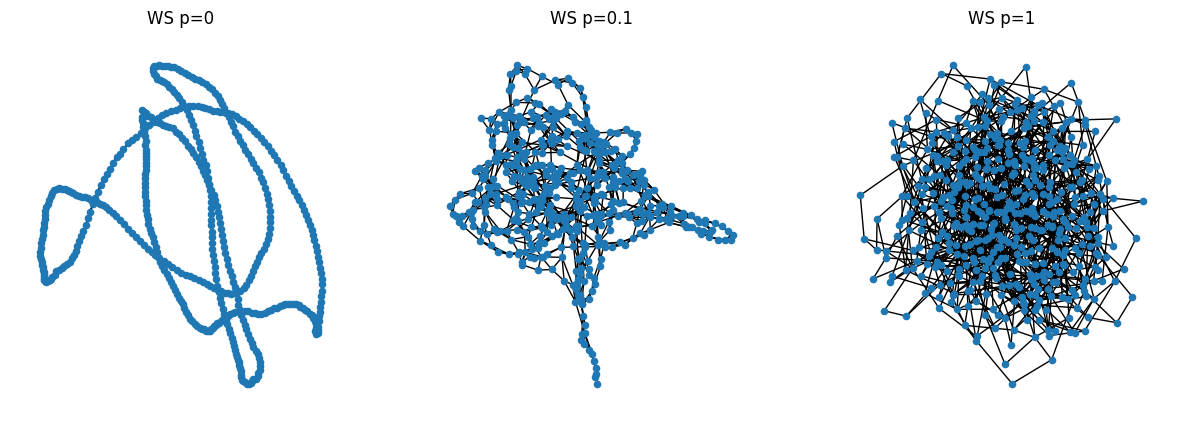

In [72]:
N = 500 # number of nodes
avg_degree = 4 # average degree

WS0 = nx.watts_strogatz_graph(N, avg_degree, 0) #WS model with p=0
WS01 = nx.watts_strogatz_graph(N, avg_degree, 0.1) #WS model with p=0.1
WS1 = nx.watts_strogatz_graph(N, avg_degree, 1) #WS model with p=1

# compute the average shortest path length for each WS graph
avg_path_length0 = nx.average_shortest_path_length(WS0)
avg_path_length01 = nx.average_shortest_path_length(WS01)
avg_path_length1 = nx.average_shortest_path_length(WS1)

print("Average shortest path length for WS graph with p=0:", avg_path_length0)
print("Average shortest path length for WS graph with p=0.1:", avg_path_length01)
print("Average shortest path length for WS graph with p=1:", avg_path_length1)


# When p = 1, almost all edges are rewired, resulting in a random graph structure.

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
nx.draw(WS0, with_labels=False, node_size=20)
plt.title("WS p=0")
plt.subplot(1, 3, 2)
nx.draw(WS01, with_labels=False, node_size=20)
plt.title("WS p=0.1")
plt.subplot(1, 3, 3)
nx.draw(WS1, with_labels=False, node_size=20)
plt.title("WS p=1")
plt.show()

<details>
  <summary style="cursor: pointer; font-weight: bold; margin-bottom: 10px; ">
    Describe what happens to the network when <var>p = 1</var>?
  </summary>
  
  <div style="padding: 10px; padding-left: 20px; box-sizing: border-box;">
    <p>p is the probability each link is rewired to a randomly chosen node, as this value is increased, the network increases its randomness. When <var>p = 1</var>, all the links of the network have been rewired to a randomly chosen node, so the network turns into a random network. </p>
  </div>
</details>

**Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.**

In [73]:
k = 4
N = 500
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
results = {p: [] for p in p_values}

for p in p_values:
    for _ in range(10):
        WS = nx.watts_strogatz_graph(N, k, p)
        avg_path_length = nx.average_shortest_path_length(WS)
        results[p].append(avg_path_length)
    mean = np.mean(results[p])
    print(f"p={p}, Average Shortest Path Length: {mean:.2f}")


p=0, Average Shortest Path Length: 62.88
p=0.01, Average Shortest Path Length: 22.74
p=0.03, Average Shortest Path Length: 13.75
p=0.05, Average Shortest Path Length: 10.26
p=0.1, Average Shortest Path Length: 7.47
p=0.2, Average Shortest Path Length: 6.12
p=0.3, Average Shortest Path Length: 5.51
p=0.4, Average Shortest Path Length: 5.16
p=0.5, Average Shortest Path Length: 5.01
p=0.6, Average Shortest Path Length: 4.88
p=0.7, Average Shortest Path Length: 4.81
p=0.8, Average Shortest Path Length: 4.78
p=0.9, Average Shortest Path Length: 4.76
p=1.0, Average Shortest Path Length: 4.76


**As it can be seen in the results above, for values of $p$ equal or higher than $0.6$ we start finding values of average shortest path lenghts close to the ones we find in random networks ($p = 1$).**

**Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).**

In [74]:
k = 4
N = 500
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
results = {p: [] for p in p_values}
means = {}
stds = {}

for p in p_values:
    for _ in range(50):
        WS = nx.watts_strogatz_graph(N, k, p)
        avg_path_length = nx.average_shortest_path_length(WS)
        results[p].append(avg_path_length)
    mean = np.mean(results[p])
    std = np.std(results[p])
    means[p] = mean
    stds[p] = std

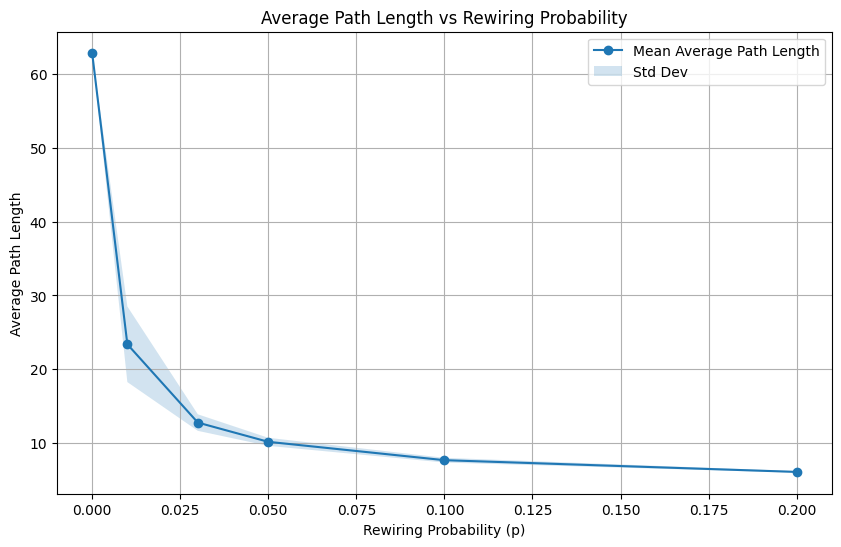

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(p_values, [means[p] for p in p_values], marker='o', label='Mean Average Path Length')
plt.fill_between(p_values, [means[p] - stds[p] for p in p_values], [means[p] + stds[p] for p in p_values], alpha=0.2, label='Std Dev')
plt.title('Average Path Length vs Rewiring Probability')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Path Length')
plt.legend()
plt.grid()
plt.show()

<details>
  <summary style="cursor: pointer; font-weight: bold; margin-bottom: 10px; ">
    Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.
  </summary>
  
  <div style="padding: 10px; padding-left: 20px; box-sizing: border-box;">
    <p>The plot shows the average shortest path length &lt;d&gt; (with standard deviation as error bars) for Watts–Strogatz networks with <var>N = 500</var> nodes, average degree <var>&lt;k&gt; = 4</var>, and varying rewiring probability <var>p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}</var>. The results demonstrate that the average path length drops sharply with just a small amount of rewiring (<var>p</var>), indicating that the small-world regime (high clustering and short average path lengths) emerges with only a few random “shortcuts.” The error bars highlight that variability in path length is larger at small <var>p</var>, but decreases as <var>p</var> increases.</p>
  </div>
</details>


#### **Part 2**


*BA Edition*.
  * **Note**: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network. 

=== Barabási-Albert Model Implementation ===

Initial network: nodes = [0, 1], edges = [(0, 1)]
Network size: 2 nodes, 1 edges



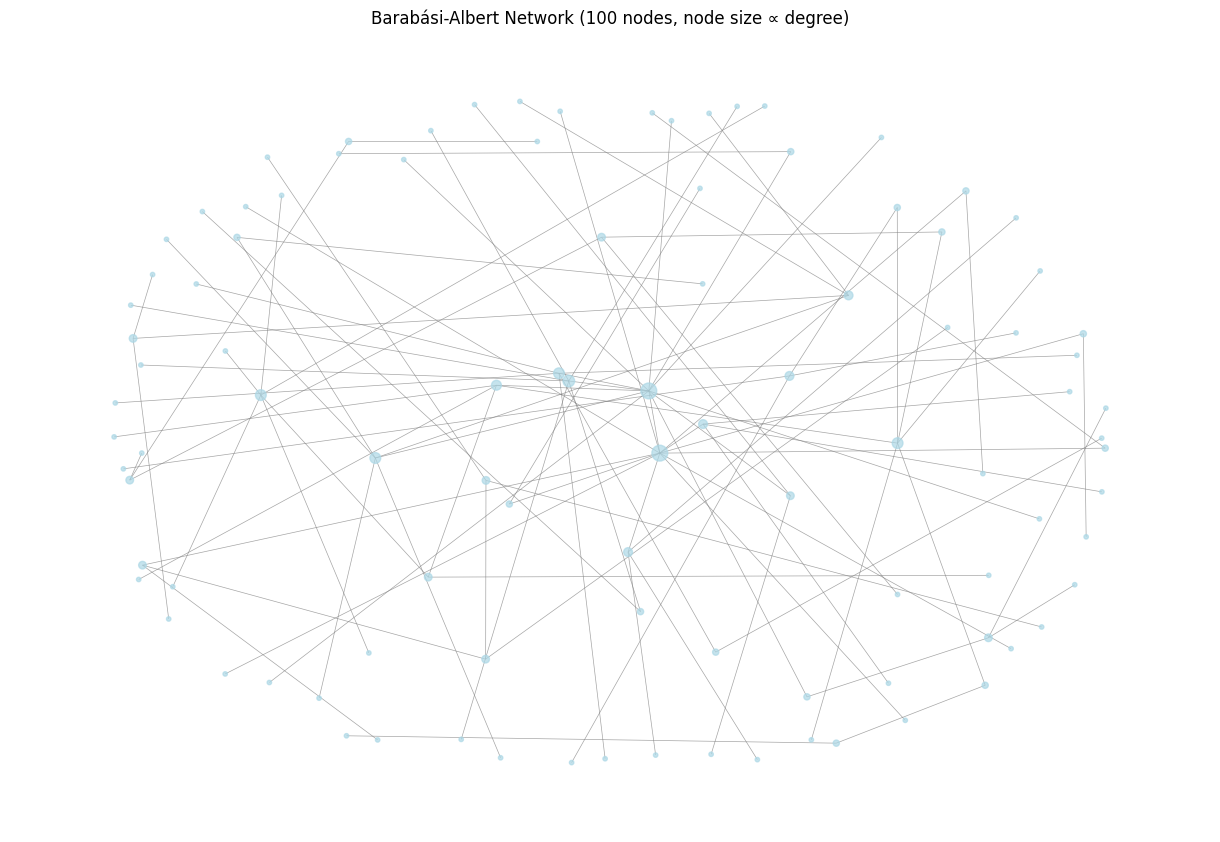


Step 4: Growing network to 5000 nodes...
  Progress: 500 nodes...
  Progress: 1000 nodes...
  Progress: 1500 nodes...
  Progress: 2000 nodes...
  Progress: 2500 nodes...
  Progress: 3000 nodes...
  Progress: 3500 nodes...
  Progress: 4000 nodes...
  Progress: 4500 nodes...
Final network: 5000 nodes, 4999 edges

Step 5: Calculating degree statistics...
Minimum degree: 1
Maximum degree: 102
Average degree: 2.00
Standard deviation: 3.32

Step 6: Creating degree distribution...
Degree distribution calculated with 50 bins
Non-zero bins for log-log plot: 23

Step 7: Plotting degree distributions...


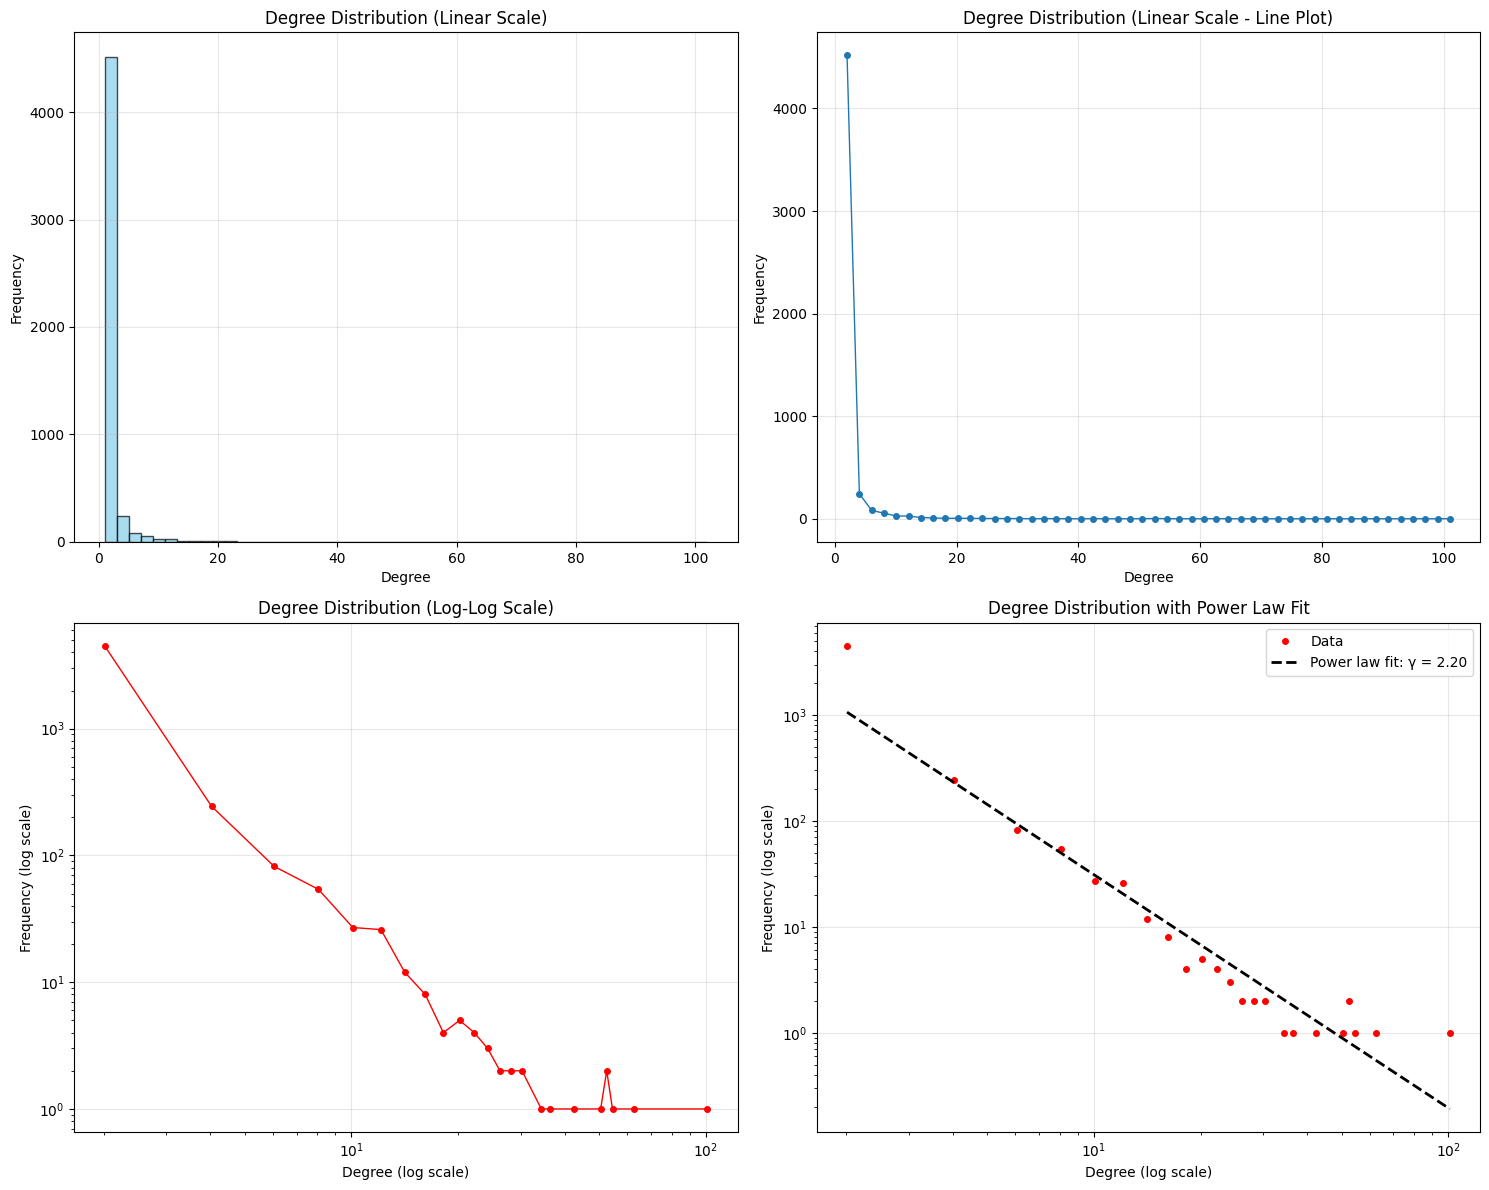


Power law analysis:
Estimated power law exponent γ = 2.202

Additional network statistics:
Network density: 0.000400
Total edges: 4999
Expected edges for tree: 4999

Degree distribution summary:
Nodes with degree 1: 3335
Nodes with degree > 10: 86
Nodes with degree > 100: 1

=== Barabási-Albert Model Complete ===


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import networkx as nx

print("=== Barabási-Albert Model Implementation ===\n")

# Step 1: Create initial graph with a single link
nodes = [0, 1]
edges = [(0, 1)]
print(f"Initial network: nodes = {nodes}, edges = {edges}")
print(f"Network size: {len(nodes)} nodes, {len(edges)} edges\n")

# Step 2: Add nodes one by one up to 100 nodes

def add_node_preferential_attachment(nodes, edges, new_node_id):
    """Add a new node with preferential attachment"""
    # Create flat list of all nodes in edges (each appears proportional to degree)
    flat_node_list = []
    for edge in edges:
        flat_node_list.append(edge[0])
        flat_node_list.append(edge[1])
    
    # Select random node from flat list (this gives preferential attachment)
    selected_node = random.choice(flat_node_list)
    
    # Add new node and edge
    nodes.append(new_node_id)
    edges.append((new_node_id, selected_node))
    
    return nodes, edges

# Grow to 100 nodes
target_size_100 = 100
for i in range(2, target_size_100):
    nodes, edges = add_node_preferential_attachment(nodes, edges, i)

# Step 3: Plot the network (100 nodes)

# Create NetworkX graph for visualization
G_100 = nx.Graph()
G_100.add_nodes_from(nodes)
G_100.add_edges_from(edges)

# Calculate degree for each node
node_degrees = dict(G_100.degree())
node_sizes = [node_degrees[n]*10 for n in G_100.nodes()]  # scale factor 10 for visibility

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_100, k=1, iterations=50)
nx.draw(G_100, pos, node_size=node_sizes, node_color='lightblue', 
    edge_color='gray', alpha=0.7, width=0.5)
plt.title("Barabási-Albert Network (100 nodes, node size ∝ degree)")
plt.axis('off')
plt.show()

# Step 4: Extend to 5000 nodes
print("\nStep 4: Growing network to 5000 nodes...")
target_size_5000 = 5000

for i in range(target_size_100, target_size_5000):
    nodes, edges = add_node_preferential_attachment(nodes, edges, i)
    
    # Progress indicator
    if i % 500 == 0:
        print(f"  Progress: {i} nodes...")

print(f"Final network: {len(nodes)} nodes, {len(edges)} edges")

# Step 5: Calculate degree statistics
print("\nStep 5: Calculating degree statistics...")

# Calculate degrees
degrees = defaultdict(int)
for edge in edges:
    degrees[edge[0]] += 1
    degrees[edge[1]] += 1

degree_values = list(degrees.values())
min_degree = min(degree_values)
max_degree = max(degree_values)

print(f"Minimum degree: {min_degree}")
print(f"Maximum degree: {max_degree}")
print(f"Average degree: {np.mean(degree_values):.2f}")
print(f"Standard deviation: {np.std(degree_values):.2f}")

# Step 6: Create degree distribution using numpy.histogram
print("\nStep 6: Creating degree distribution...")

# Use numpy.histogram to bin the degree distribution
hist, bin_edges = np.histogram(degree_values, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Filter out zero counts for log-log plot
nonzero_mask = hist > 0
hist_nonzero = hist[nonzero_mask]
bin_centers_nonzero = bin_centers[nonzero_mask]

print(f"Degree distribution calculated with {len(hist)} bins")
print(f"Non-zero bins for log-log plot: {len(hist_nonzero)}")

# Step 7: Plot the distributions
print("\nStep 7: Plotting degree distributions...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Linear scale histogram
ax1.bar(bin_centers, hist, width=np.diff(bin_edges), alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Frequency')
ax1.set_title('Degree Distribution (Linear Scale)')
ax1.grid(True, alpha=0.3)

# Linear scale line plot
ax2.plot(bin_centers, hist, 'o-', markersize=4, linewidth=1)
ax2.set_xlabel('Degree')
ax2.set_ylabel('Frequency')
ax2.set_title('Degree Distribution (Linear Scale - Line Plot)')
ax2.grid(True, alpha=0.3)

# Log-log scale
ax3.loglog(bin_centers_nonzero, hist_nonzero, 'o-', markersize=4, linewidth=1, color='red')
ax3.set_xlabel('Degree (log scale)')
ax3.set_ylabel('Frequency (log scale)')
ax3.set_title('Degree Distribution (Log-Log Scale)')
ax3.grid(True, alpha=0.3)

# Log-log with power law fit
# Fit power law: y = a * x^(-gamma)
log_x = np.log10(bin_centers_nonzero)
log_y = np.log10(hist_nonzero)
coeffs = np.polyfit(log_x, log_y, 1)
gamma = -coeffs[0]  # Power law exponent
a = 10**coeffs[1]   # Normalization constant

# Generate fit line
x_fit = np.logspace(np.log10(min(bin_centers_nonzero)), np.log10(max(bin_centers_nonzero)), 100)
y_fit = a * x_fit**(-gamma)

ax4.loglog(bin_centers_nonzero, hist_nonzero, 'o', markersize=4, label='Data', color='red')
ax4.loglog(x_fit, y_fit, '--', linewidth=2, label=f'Power law fit: γ = {gamma:.2f}', color='black')
ax4.set_xlabel('Degree (log scale)')
ax4.set_ylabel('Frequency (log scale)')
ax4.set_title('Degree Distribution with Power Law Fit')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPower law analysis:")
print(f"Estimated power law exponent γ = {gamma:.3f}")

# Additional analysis
print(f"\nAdditional network statistics:")
print(f"Network density: {2 * len(edges) / (len(nodes) * (len(nodes) - 1)):.6f}")
print(f"Total edges: {len(edges)}")
print(f"Expected edges for tree: {len(nodes) - 1}")

# Show degree distribution summary
print(f"\nDegree distribution summary:")
print(f"Nodes with degree 1: {sum(1 for d in degree_values if d == 1)}")
print(f"Nodes with degree > 10: {sum(1 for d in degree_values if d > 10)}")
print(f"Nodes with degree > 100: {sum(1 for d in degree_values if d > 100)}")

print("\n=== Barabási-Albert Model Complete ===")

# Assignment 1.2: Stats and visualization of the Rock Music Network

#### Explain your process in words

* **First, simply describe the steps of the process (what you did, step by step)**
* **Then, write a short section about which part of the process that was most difficult**
* **Next write a short section about how you used LLMs to help you**
* **Finally, compose a short section about what you would do differently if you had to do it again**

To develop the Rock Music Network, we first started by obtaining a text document containing the list of rock artists from Wikipedia. Then, from this document, we extracted all the artist names by looking for the wiki-links ([[...]]) so that we had a clean list of page titles. For each artist in the list, we used the Wikipedia API to download the raw wikitext of their page, and we saved each raw wikitext document in a folder. After this, for each document, we looked at its internal links. If any of this links matched an artist of the list of rock artists created in the first step, we recorded that connection. This resulted in a dictionary where each key was an artist and each value was the set of artists linked from that page. Finally, we used this dictionary to build a graph that represents the network of rock artists and their connections on Wikipedia.

The hardest part was extracting the wikitext from the Wikipedia API, as we didn't have experience with the API. But by reading the recommended links and asking LLMs we managed to solve this part easily. 

We used LLMs as a coding assistant. We first implemented the code ourselves for a single artist to make sure we understood the process. Once we had a working code, we asked an LLM to help us scale it to handle the whole list of artists.

Overall, we are happy with our approach. 

#### Simple network statistics and analysis.

In [77]:
import requests

url = "https://raw.githubusercontent.com/albapim/Social_Graphs_Assignments/refs/heads/main/rock_performers_graph.gexf"
r = requests.get(url)
with open("rock_performers_graph.gexf", "wb") as f:
    f.write(r.content)

In [78]:
# Load the rock music network from the GEXF file
rock_network = nx.read_gexf("rock_performers_graph.gexf")

##### What is the number of nodes in the network?
##### More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)

In [79]:
# number of nodes
print("Number of nodes:", rock_network.number_of_nodes())
# number of edges
print("Number of edges:", rock_network.number_of_edges())

Number of nodes: 485
Number of edges: 13672


##### Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

* **Compare the out-degree distribution to a *random network* with the same number of nodes and links.**
* **Compare the in-degree distribution to a *scale-free* network with the same number of nodes.**

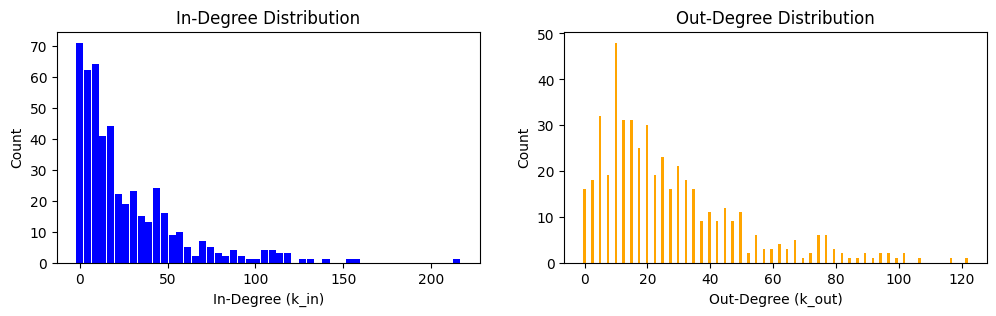

In [80]:
# In-degree distribution
in_degrees = [d for n, d in rock_network.in_degree()]
hist_in = np.histogram(in_degrees, bins=50)

# Out-degree distribution
out_degrees = [d for n, d in rock_network.out_degree()]
hist_out = np.histogram(out_degrees, bins=50)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.bar(hist_in[1][:-1], hist_in[0], color='blue', width=4)
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree (k_in)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.bar(hist_out[1][:-1], hist_out[0], color='orange')
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree (k_out)")
plt.ylabel("Count")

plt.show()

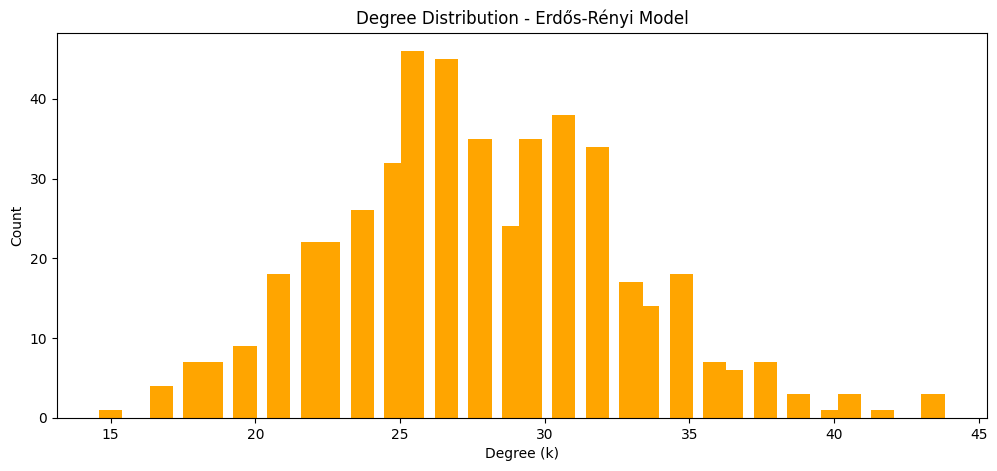

In [81]:
N = rock_network.number_of_nodes()
M = rock_network.number_of_edges()
p = M / (N * (N - 1))

ER = nx.gnp_random_graph(N, p, seed=42)

plt.figure(figsize=(12, 5))
degrees_ER = [d for n, d in ER.degree()]
hist_ER = np.histogram(degrees_ER, bins=50)
plt.bar(hist_ER[1][:-1], hist_ER[0], color='orange')
plt.title("Degree Distribution - Erdős-Rényi Model")
plt.xlabel("Degree (k)")
plt.ylabel("Count")
plt.show()


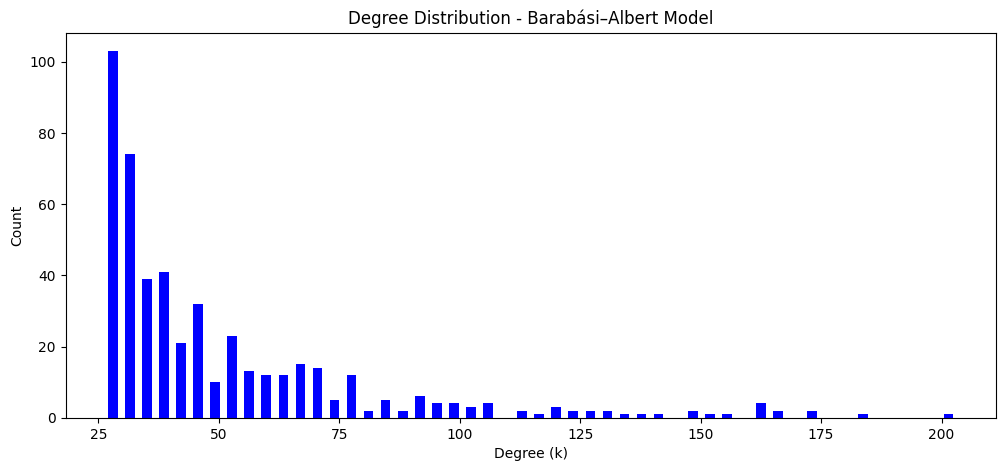

In [82]:
N = rock_network.number_of_nodes()
avg_degree = sum(dict(rock_network.degree()).values()) / N
m = int(round(avg_degree / 2))  # since BA adds m edges per new node

BA = nx.barabasi_albert_graph(N, m, seed=42)

plt.figure(figsize=(12, 5))
degrees_BA = [d for n, d in BA.degree()]
hist_BA = np.histogram(degrees_BA, bins=50)
plt.bar(hist_BA[1][:-1], hist_BA[0], color='blue', width=2)
plt.title("Degree Distribution - Barabási–Albert Model")
plt.xlabel("Degree (k)")
plt.ylabel("Count")
plt.show()

The in-degree distribution shows how many different artist pages mention a given performer, while the out-degree distribution measures how many other artists are mentioned on a single artist's page. Knowing this, in the in-degree distribution we see that most artists recieve only a few incoming links (intial part of the histogram), but some of them (the famous figures in rock history) recieve a very large number of versions (central part). This is why we observe a tailed distribution. On the other hand, in the out-degree distribution we observe more variability, as there is a wider range of how many artists are mentioned in one artist's page. 

Comparing the out-degree results with a random network, we observe a quite similar behaviour, as there is more variability in the results. On the other hand, the Barabási-Albert model shows a degree distribution more similar to the in-degree one, as this network grows by preferential attachment (new nodes are more likely to connect to already well-connected nodes), similar to what rock bands did, they probably got inspiration/collaboration from more popular bands. 

##### Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?**


In [83]:
# Top 5 by in-degree
top_in = sorted(rock_network.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by in-degree (most referenced by others):")
for artist, deg in top_in:
    print(f"{artist}: {deg}")

# Top 5 by out-degree
top_out = sorted(rock_network.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 performers by out-degree (most references to others):")
for artist, deg in top_out:
    print(f"{artist}: {deg}")

Top 5 performers by in-degree (most referenced by others):
The_Beatles: 219
Led_Zeppelin: 161
The_Rolling_Stones: 157
U2: 143
David_Bowie: 135

Top 5 performers by out-degree (most references to others):
The_Beatles: 124
Coldplay: 117
Red_Hot_Chili_Peppers: 109
Aerosmith: 104
Green_Day: 102


The top 5 performers by the in-degree distribution are very famous rock artists, which makes sense for them to be very referenced. On the other hand, the top 5 out-degree performers are less known performers.

##### What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

In [84]:
# Get all nodes with their word counts
word_counts = [(node, data.get('word_count', 0)) for node, data in rock_network.nodes(data=True)]

# Sort by word count descending
top_10_longest = sorted(word_counts, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 pages with the longest wiki entries:")
for artist, count in top_10_longest:
    print(f"{artist}: {count} words")

Top 10 pages with the longest wiki entries:
Bob_Dylan: 37016 words
Paul_McCartney: 36501 words
The_Beatles: 36417 words
Guns_N%27_Roses: 35305 words
Elton_John: 33898 words
The_Beach_Boys: 32711 words
David_Bowie: 31220 words
U2: 31026 words
The_Rolling_Stones: 30999 words
Queen_(band): 30924 words


#### Part 3 Visualization Exercise - Let's build a simple visualization of the network

In [87]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

def visualize_network(G_directed, figsize=(16, 12)):
    """
    Comprehensive network visualization with multiple layout algorithms
    
    Parameters:
    -----------
    G_directed : nx.DiGraph
        The original directed graph
    figsize : tuple
        Figure size for the plots
    """
    
    print("=" * 60)
    print("NETWORK VISUALIZATION")
    print("=" * 60)
    
    # 1. Convert directed graph to undirected
    print("\n1. Converting directed graph to undirected...")
    G_undirected = G_directed.to_undirected()
    
    print(f"Original directed graph: {G_directed.number_of_nodes()} nodes, {G_directed.number_of_edges()} edges")
    print(f"Undirected graph: {G_undirected.number_of_nodes()} nodes, {G_undirected.number_of_edges()} edges")
    
    # 2. Prepare node attributes for visualization
    print("\n2. Preparing node attributes...")
    
    # Calculate degrees for undirected graph
    degrees = dict(G_undirected.degree())
    print(f"Degree range: {min(degrees.values())} - {max(degrees.values())}")
    
    # Extract content length (try different possible attribute names)
    content_lengths = {}
    content_attr_name = None
    
    for attr in ['word_count']:
        if any(attr in G_undirected.nodes[node] for node in G_undirected.nodes()):
            content_attr_name = attr
            content_lengths = {node: G_undirected.nodes[node].get(attr, 0) 
                             for node in G_undirected.nodes()}
            break
    
    if not content_lengths or all(v == 0 for v in content_lengths.values()):
        # Generate random content lengths for demonstration
        print("No content length attribute found. Generating random values for demonstration...")
        content_lengths = {node: np.random.randint(500, 3000) 
                          for node in G_undirected.nodes()}
        content_attr_name = "generated_content_length"
    
    print(f"Content length range: {min(content_lengths.values())} - {max(content_lengths.values())}")
    print(f"Using attribute: '{content_attr_name}'")
    
    # 3. Prepare visualization parameters
    
    # Node sizes based on degree (scale appropriately)
    min_size = 100
    max_size = 1000
    degree_values = list(degrees.values())
    min_degree = min(degree_values)
    max_degree = max(degree_values)
    
    if max_degree == min_degree:
        node_sizes = [500 for _ in degree_values]  # All same size if all degrees equal
    else:
        node_sizes = [min_size + (max_size - min_size) * 
                     (degree - min_degree) / (max_degree - min_degree) 
                     for degree in degree_values]
    
    # Node colors based on content length
    content_values = list(content_lengths.values())
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Network Visualization with Different Layouts', fontsize=16, fontweight='bold')
    
    # Color schemes to try
    colormaps = ['viridis', 'plasma', 'Blues', 'Reds']
    layout_functions = [nx.spring_layout, nx.kamada_kawai_layout, nx.circular_layout, nx.random_layout]
    layout_names = ['Spring Layout', 'Kamada-Kawai Layout', 'Circular Layout', 'Random Layout']
    
    # Create visualizations
    for idx, (ax, cmap, layout_func, layout_name) in enumerate(zip(axes.flat, colormaps, layout_functions, layout_names)):
        
        print(f"\n3.{idx+1}. Creating {layout_name}...")
        
        try:
            # Calculate layout positions
            if layout_func == nx.kamada_kawai_layout:
                # Kamada-Kawai can be slow for large graphs, add parameters for efficiency
                if G_undirected.number_of_nodes() > 100:
                    pos = layout_func(G_undirected, scale=1.0)
                else:
                    pos = layout_func(G_undirected, scale=1.0)
            elif layout_func == nx.spring_layout:
                # Spring layout parameters for better results
                pos = layout_func(G_undirected, k=1, iterations=50, seed=42)
            else:
                pos = layout_func(G_undirected)
            
            # Draw the network
            nodes = nx.draw_networkx_nodes(
                G_undirected, pos,
                node_color=content_values,
                node_size=node_sizes,
                cmap=plt.cm.get_cmap(cmap),
                alpha=0.8,
                ax=ax
            )
            
            # Draw edges
            nx.draw_networkx_edges(
                G_undirected, pos,
                alpha=0.6,
                edge_color='gray',
                width=0.5,
                ax=ax
            )
            
            # Draw labels if not too many nodes
            if G_undirected.number_of_nodes() <= 20:
                nx.draw_networkx_labels(
                    G_undirected, pos,
                    font_size=8,
                    font_color='black',
                    font_weight='bold',
                    ax=ax
                )
            
            ax.set_title(f'{layout_name}\n(Color: Content Length, Size: Degree)', fontsize=12)
            ax.axis('off')
            
            # Add colorbar for the first plot
            if idx == 0:
                plt.colorbar(nodes, ax=ax, label=f'Content Length ({content_attr_name})', shrink=0.6)
        
        except Exception as e:
            ax.text(0.5, 0.5, f'Error with {layout_name}:\n{str(e)}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{layout_name} (Error)')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Create detailed comparison of Spring vs Kamada-Kawai
    print("\n4. Detailed comparison: Spring Layout vs Kamada-Kawai Layout")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Detailed Comparison: Spring Layout vs Kamada-Kawai Layout', fontsize=16, fontweight='bold')
    
    # Spring Layout
    try:
        pos_spring = nx.spring_layout(G_undirected, k=1, iterations=50, seed=42)
        
        nodes1 = nx.draw_networkx_nodes(
            G_undirected, pos_spring,
            node_color=content_values,
            node_size=node_sizes,
            cmap='viridis',
            alpha=0.8,
            ax=ax1
        )
        
        nx.draw_networkx_edges(
            G_undirected, pos_spring,
            alpha=0.6,
            edge_color='gray',
            width=1.0,
            ax=ax1
        )
        
        if G_undirected.number_of_nodes() <= 30:
            nx.draw_networkx_labels(
                G_undirected, pos_spring,
                font_size=10,
                font_color='white',
                font_weight='bold',
                ax=ax1
            )
        
        ax1.set_title('Spring Layout\n(Force-directed: nodes repel, edges attract)', fontsize=14)
        ax1.axis('off')
        
        # Add colorbar
        cbar1 = plt.colorbar(nodes1, ax=ax1, label=f'Content Length ({content_attr_name})')
        
    except Exception as e:
        ax1.text(0.5, 0.5, f'Spring Layout Error:\n{str(e)}', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Spring Layout (Error)')
    
    # Kamada-Kawai Layout
    try:
        if G_undirected.number_of_nodes() > 100:
            pos_kk = nx.kamada_kawai_layout(G_undirected, scale=1.0)
        else:
            pos_kk = nx.kamada_kawai_layout(G_undirected, scale=1.0)
        
        nodes2 = nx.draw_networkx_nodes(
            G_undirected, pos_kk,
            node_color=content_values,
            node_size=node_sizes,
            cmap='viridis',
            alpha=0.8,
            ax=ax2
        )
        
        nx.draw_networkx_edges(
            G_undirected, pos_kk,
            alpha=0.6,
            edge_color='gray',
            width=1.0,
            ax=ax2
        )
        
        if G_undirected.number_of_nodes() <= 30:
            nx.draw_networkx_labels(
                G_undirected, pos_kk,
                font_size=10,
                font_color='white',
                font_weight='bold',
                ax=ax2
            )
        
        ax2.set_title('Kamada-Kawai Layout\n(Energy-based: minimizes overall energy)', fontsize=14)
        ax2.axis('off')
        
        # Add colorbar
        cbar2 = plt.colorbar(nodes2, ax=ax2, label=f'Content Length ({content_attr_name})')
        
    except Exception as e:
        ax2.text(0.5, 0.5, f'Kamada-Kawai Layout Error:\n{str(e)}', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Kamada-Kawai Layout (Error)')
    
    plt.tight_layout()
    plt.show()
    
    # 5. Create a size legend
    print("\n5. Creating size legend...")
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Create size legend
    unique_degrees = sorted(set(degrees.values()))
    if len(unique_degrees) > 10:
        # Show only a sample if too many unique degrees
        step = len(unique_degrees) // 10
        unique_degrees = unique_degrees[::step]
    
    legend_sizes = []
    for degree in unique_degrees:
        if max_degree == min_degree:
            size = 500
        else:
            size = min_size + (max_size - min_size) * (degree - min_degree) / (max_degree - min_degree)
        legend_sizes.append(size)
    
    # Plot legend
    y_positions = np.linspace(0, len(unique_degrees)-1, len(unique_degrees))
    scatter = ax.scatter(np.zeros(len(unique_degrees)), y_positions, 
                        s=legend_sizes, c=unique_degrees, cmap='viridis', alpha=0.7)
    
    # Add text labels
    for i, (degree, size) in enumerate(zip(unique_degrees, legend_sizes)):
        ax.text(0.5, i, f'Degree: {degree}', va='center', fontsize=10)
    
    ax.set_xlim(-1, 2)
    ax.set_ylim(-0.5, len(unique_degrees)-0.5)
    ax.set_ylabel('Node Examples')
    ax.set_title('Node Size Legend\n(Size corresponds to node degree)')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Print analysis summary
    print("\n6. VISUALIZATION SUMMARY:")
    print("-" * 40)
    print(f"• Network converted from directed ({G_directed.number_of_edges()} edges) "
          f"to undirected ({G_undirected.number_of_edges()} edges)")
    print(f"• Node sizes scaled by degree (range: {min_degree} - {max_degree})")
    print(f"• Node colors based on '{content_attr_name}' "
          f"(range: {min(content_values)} - {max(content_values)})")
    print(f"• Layouts compared: Spring (force-directed) vs Kamada-Kawai (energy-based)")
    
    print("\n• Layout Algorithm Differences:")
    print("  - Spring Layout: Fast, good for most networks, emphasizes local structure")
    print("  - Kamada-Kawai: Slower but more stable, better for showing global structure")
    print("  - Circular: Good for showing all nodes clearly, less emphasis on connections")
    print("  - Random: Baseline comparison, no meaningful structure")
    
    return G_undirected, pos_spring if 'pos_spring' in locals() else None


NETWORK VISUALIZATION

1. Converting directed graph to undirected...
Original directed graph: 485 nodes, 13672 edges
Undirected graph: 485 nodes, 9323 edges

2. Preparing node attributes...
Degree range: 0 - 223
Content length range: 952 - 37016
Using attribute: 'word_count'

3.1. Creating Spring Layout...

3.2. Creating Kamada-Kawai Layout...

3.3. Creating Circular Layout...

3.4. Creating Random Layout...


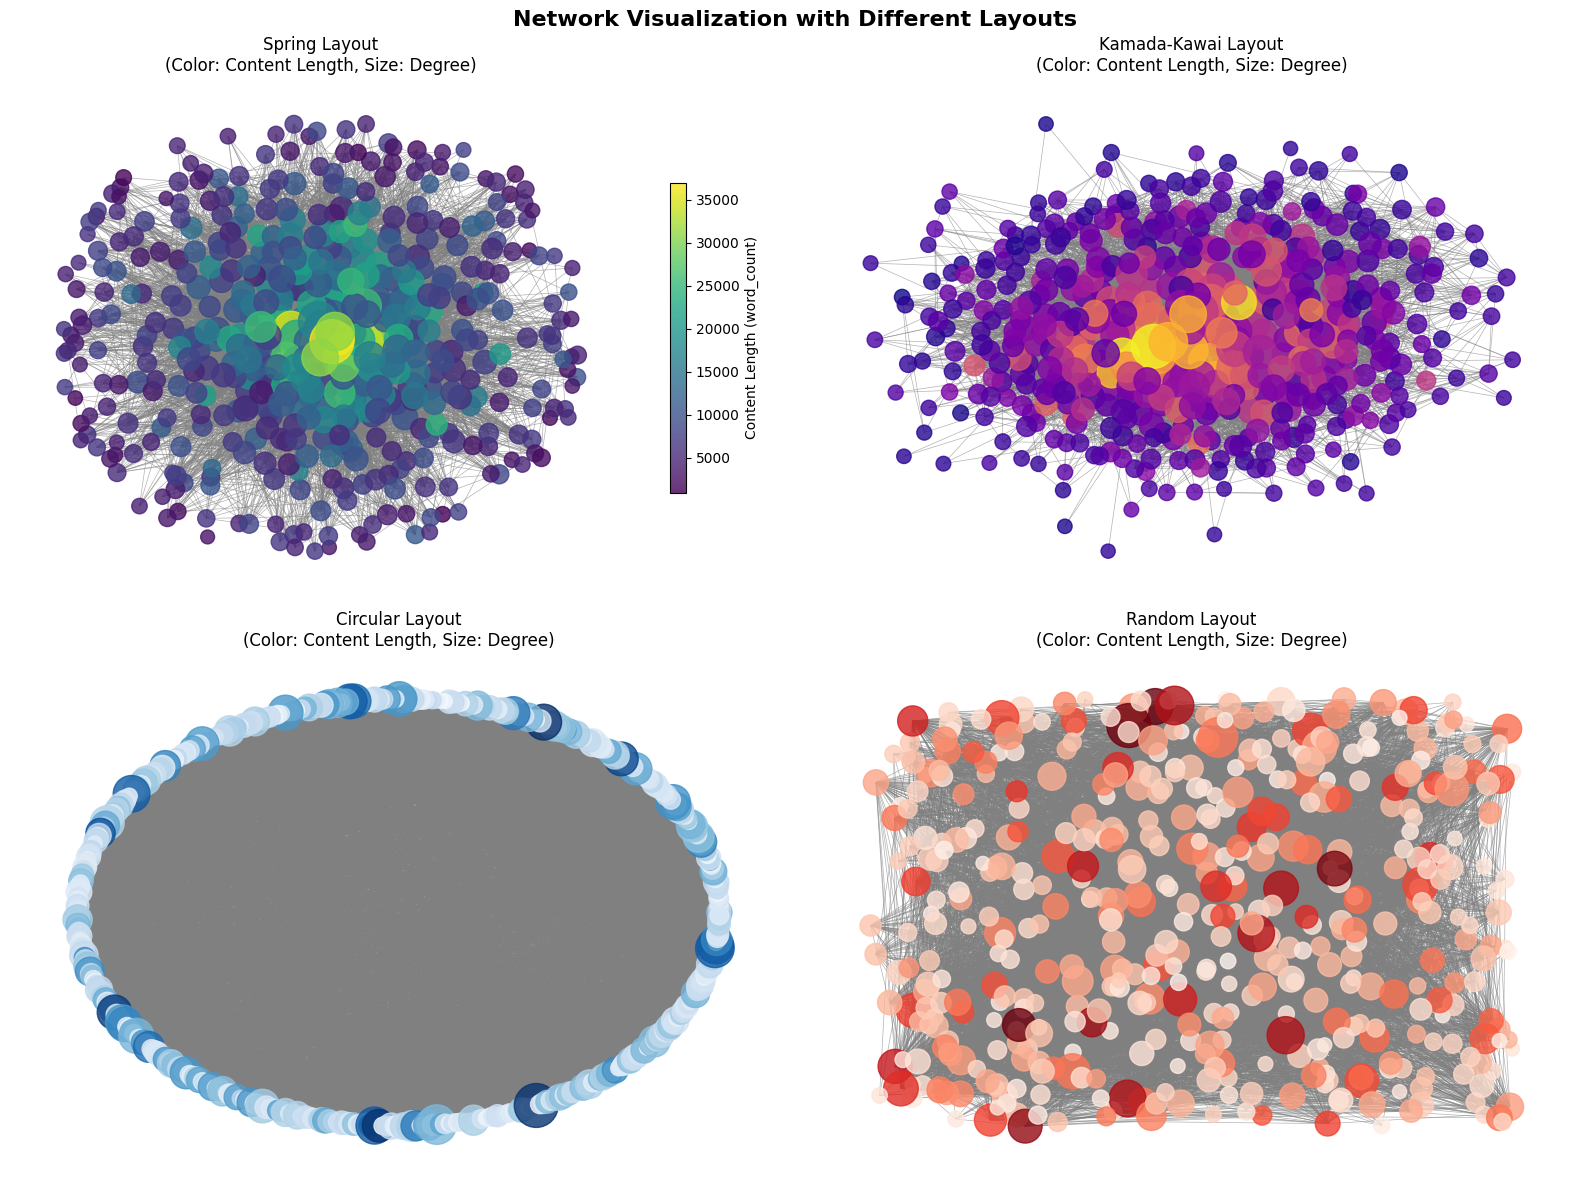


4. Detailed comparison: Spring Layout vs Kamada-Kawai Layout


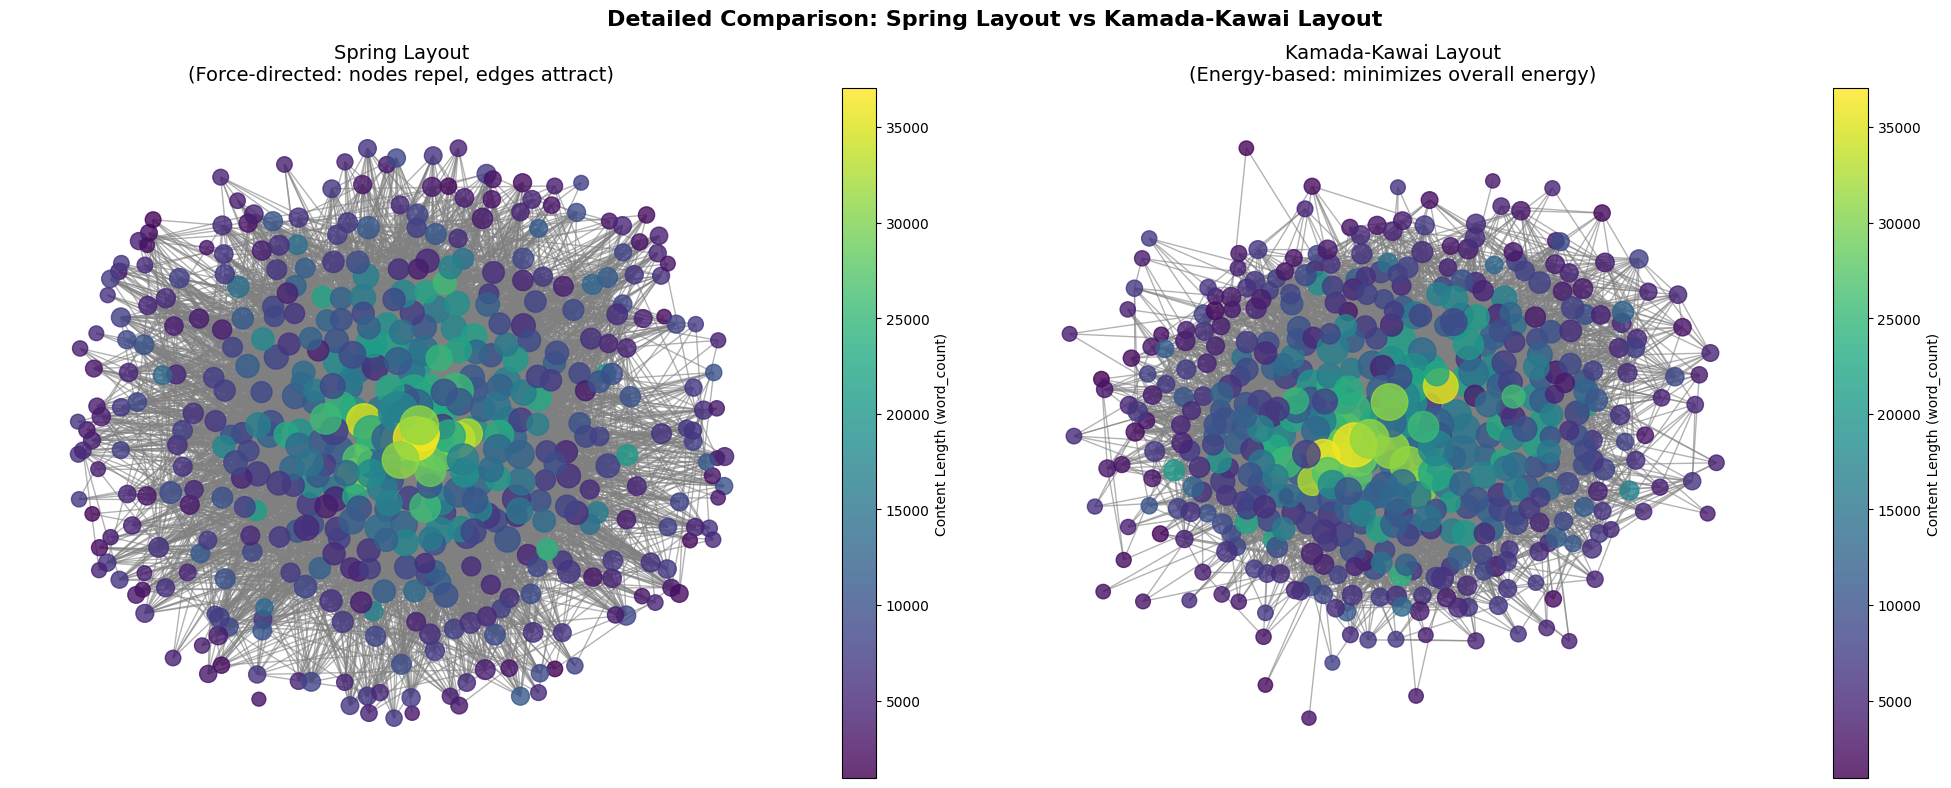


5. Creating size legend...


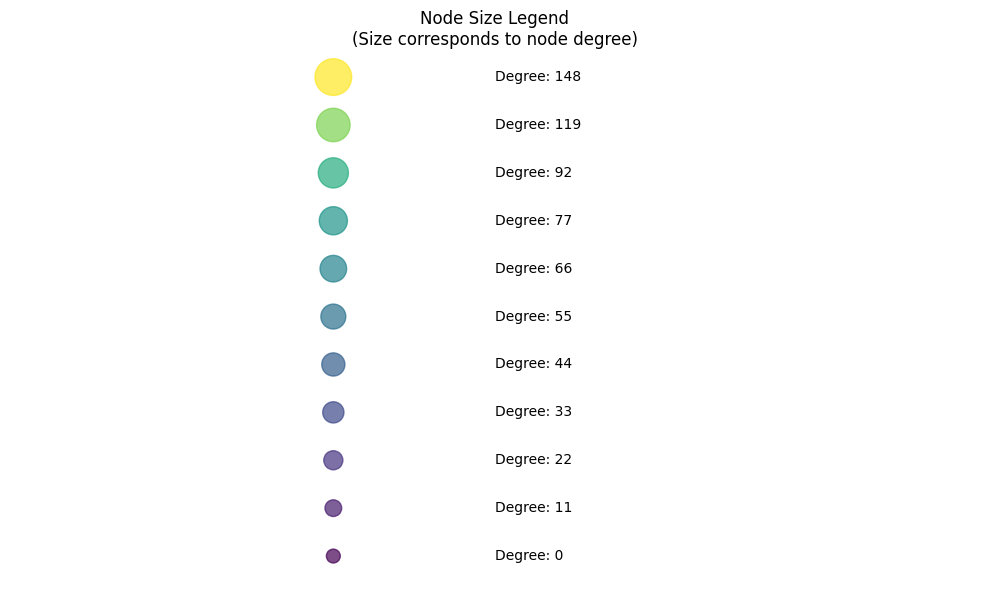


6. VISUALIZATION SUMMARY:
----------------------------------------
• Network converted from directed (13672 edges) to undirected (9323 edges)
• Node sizes scaled by degree (range: 0 - 223)
• Node colors based on 'word_count' (range: 952 - 37016)
• Layouts compared: Spring (force-directed) vs Kamada-Kawai (energy-based)

• Layout Algorithm Differences:
  - Spring Layout: Fast, good for most networks, emphasizes local structure
  - Kamada-Kawai: Slower but more stable, better for showing global structure
  - Circular: Good for showing all nodes clearly, less emphasis on connections
  - Random: Baseline comparison, no meaningful structure


In [88]:
# Create or load your graph
G_directed = nx.read_gexf("rock_performers_graph.gexf")

# Run the main visualization
G_undirected, pos = visualize_network(G_directed)

# Work Distribution


All team members worked on all parts on their own, collaboratively the first contributions were: <br>
* **242798 ( Dimitris Papantzikos ):** Acted as the Modeler and Coordinator. Completed the theoretical questions for the WS model and implemented the step-by-step BA model. Also managed the final notebook assembly, formatting, and submission.

* **243280 ( Alba Pi Mas ) :** Acted as the Network Builder and Analyst. Built the rock music network from scratch, performed all statistical analyses, and answered the theoretical questions for the BA model.

* **250201 ( Nikolaos Iliakis ):** Acted as the Visualizer and Writer. Created the network visualization, wrote the detailed explanation for the network construction process, and performed a final editorial review of all written content in the notebook.

# References